In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [14]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    
    rmse_tr = []
    rmse_test = []
    
    for fold in range(0,k):
        
        current_fold = k_indices[fold]
        remaining_indices = list(set(range(0,x.shape[0])) - set(current_fold))
        train_data,train_target = x[remaining_indices],y[remaining_indices]
        test_data,test_target = x[current_fold],y[current_fold]
        train_poly,test_poly = build_poly(train_data,degree),build_poly(test_data,degree)
        weight = ridge_regression(y=train_target,tx=train_poly,lambda_=lambda_)
        rmse_tr.append(np.sqrt(2 * compute_mse(y=train_target,tx=train_poly,w=weight)))
        rmse_test.append(np.sqrt(2 * compute_mse(y=test_target,tx=test_poly,w=weight)))

    loss_tr,loss_te = np.mean(rmse_tr),np.mean(rmse_test)
        
    return loss_tr, loss_te

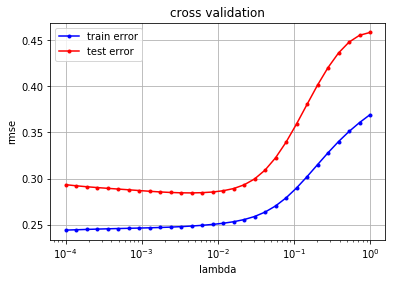

In [15]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for lambda_ in lambdas:
        loss_tr,loss_te = cross_validation(y,x,k_indices,k_fold,lambda_,degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    
       
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

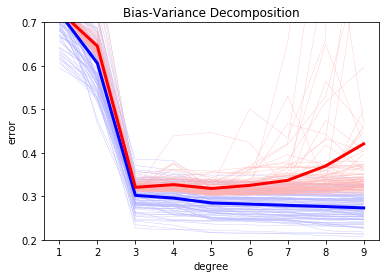

In [21]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        train_data,train_target,test_data,test_target = split_data(x,y,ratio_train,seed)
        for index_degree,degree in enumerate(degrees):
            
            train_poly,test_poly = build_poly(train_data,degree),build_poly(test_data,degree)
            weight = least_squares(y=train_target,tx=train_poly)
            loss_tr   = np.sqrt(2 * compute_mse(y=train_target,tx=train_poly,w=weight))
            loss_test = np.sqrt(2 * compute_mse(y=test_target,tx=test_poly,w=weight))
            rmse_tr[index_seed][index_degree] = loss_tr
            rmse_te[index_seed][index_degree] = loss_test
            

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()